In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the Business Question

### Overall objective: Identify Actionable Product or Marketing Insights 
Develop user segments (or personas) to inform future marketing efforts and product development. 
- This is essential for increasing the alignment and focus of products that Duolingo might release or change.
- For example, by grouping these profiles into different personas, we're able to optimize many business functions such as increasing customer relevance, improving resource allocation, boosting conversion and retention rates, and strategically growing the company in different markets.


We are given a basic outline to approach this:
- Explore the data given (survey data and app user data)
- Use quantitative methods to identify a set of user segments/personas
- Use this analysis to create product recommendations

# Exploratory Data Analysis: Understanding the Data

Here, we aim to explore the qualities of the data, from looking at summary statistics (mean, median, etc) and distributions to visualizing and running correlation analyses. While doing so, we will pay attention to the quality of the data, such as checking and imputing missing values, reformatting variables as needed, and engineering new features.

## Joining Survey data and User Behavior Data:

In [5]:
# converting to pandas dataframes
survey_data = pd.read_csv("data/survey_data.csv")
user_behavior_data = pd.read_csv("data/survey_users_app_usage.csv")

# merging the two dataframes above into one
merged = pd.merge(survey_data, user_behavior_data, on="user_id")
merged.head()

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,...,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,Unnamed: 12
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,...,58.0,True,False,275.0,91,232.0,232.0,589,849,NaN
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Yes,Male,...,4.0,True,False,22.0,54,90.0,88.0,27,125,NaN
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,...,11.0,False,True,17.0,30,49.0,47.0,30,479,NaN
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,...,11.0,False,True,55.0,93,1161.0,1028.0,40,117,NaN
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,...,64.0,False,True,417.0,85,215.0,252.0,266,1951,NaN


## Data Observations: Distributions, Comparisons, and Correlation

Right off the bat, we notice a couple unique things about this data to think about down the line. Some numeric values such as age and annual_income are placed into bins instead of having a numeric value. This means that normal numeric summary statistics may not be effective on here as purely numerical data. However, since they are automatically binned, we will have an easier time visualizing the data with plots

In [7]:
# Order lists since numerical values are being represented by strings

age_order = [
    "Under 18", 
    "18-34", 
    "35 - 54", 
    "55 - 74", 
    "75 or older"
]

income_order = [
    "$0 - $10,000",
    "$11,000 - $25,000",
    "$26,000 - $75,000",
    "$76,000 - $150,000",
    "$151,000 or more"
]

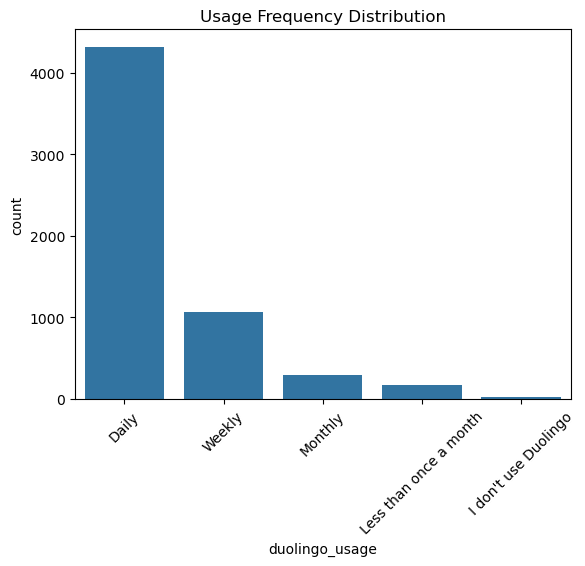

In [8]:
# Dividing users by usage frequency
sns.countplot(data=merged, x="duolingo_usage")
plt.title("Usage Frequency Distribution")
plt.xticks(rotation=45)
plt.show()

Observation: Those who use duolingo tend to use it daily, signaling that it has an extremely active user base

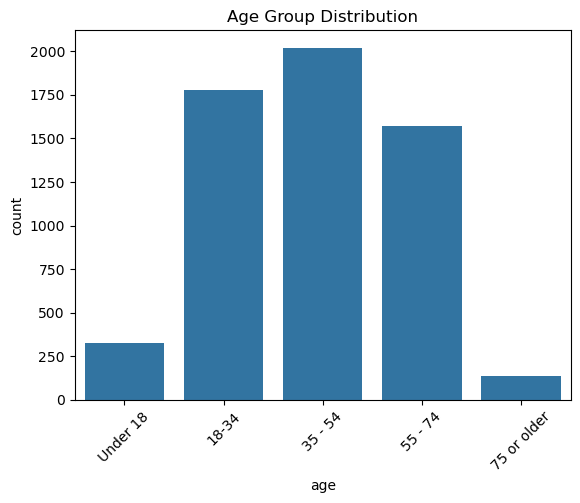

In [10]:
# Age distribution
sns.countplot(data=survey_data, x="age", order=age_order)
plt.title("Age Group Distribution")
plt.xticks(rotation=45)
plt.show()

Observation: Approx normal distribution of ages, with most users being middle aged

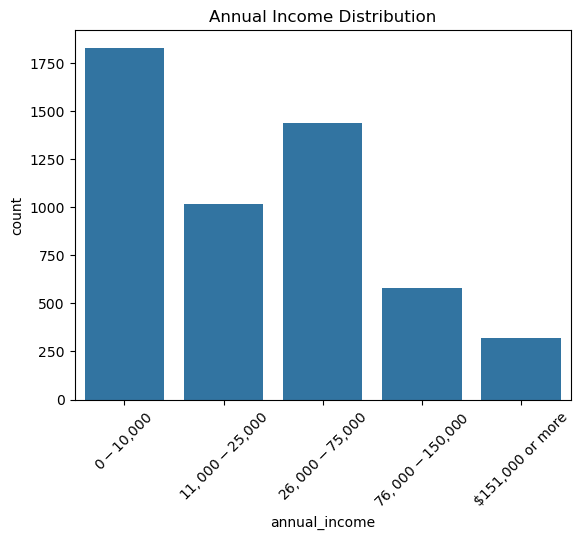

In [12]:
# Income distribution
sns.countplot(data=survey_data, x="annual_income", order=income_order)
plt.title("Annual Income Distribution")
plt.xticks(rotation=45)
plt.show()

Observation: Most users have an extremely low income of 0 - 10,000. One potential explanation for this is that most users are students, but it's hard to tell for sure from this graph. A more in detail analysis can be conducted later.

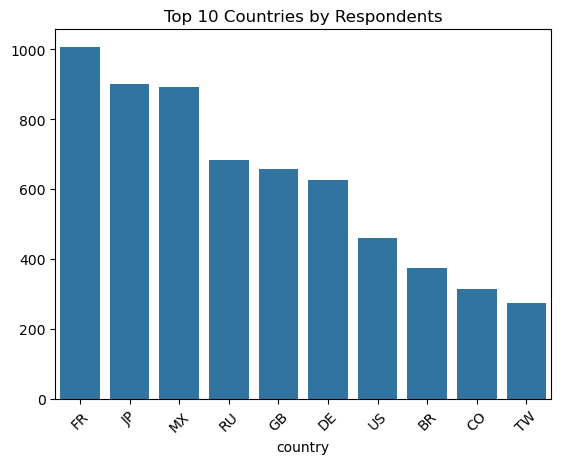

In [14]:
# Top countries by user
top_countries = survey_data["country"].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Respondents")
plt.xticks(rotation=45)
plt.show()

Observation: The platform captures a pretty diverse market, but seems to be relatively limited to Europe and the Americas (JP and TW are the exceptions). This is potentially correlated to different factors such as income, access to technology, and exposure to multilingual populations.

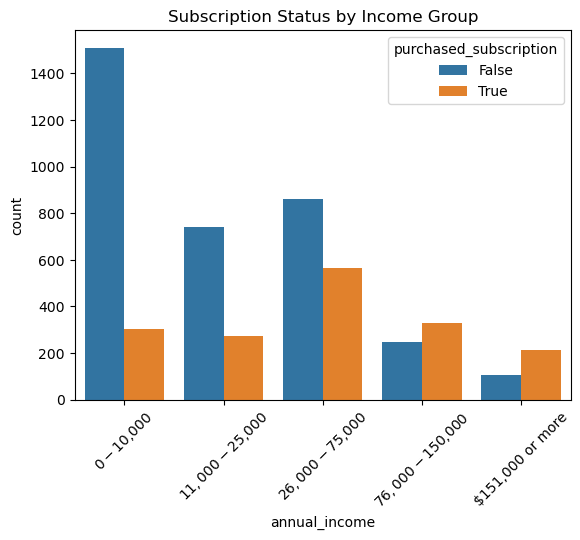

In [16]:
# Subscription vs Income
sns.countplot(data=merged, x="annual_income", hue="purchased_subscription", order=income_order)
plt.title("Subscription Status by Income Group")
plt.xticks(rotation=45)
plt.show()

Observation: As income rises, the proportion of those who purchase subscriptions rise as well. This is a natural correlation since those with more disposable income are able to spend money on apps such as this.

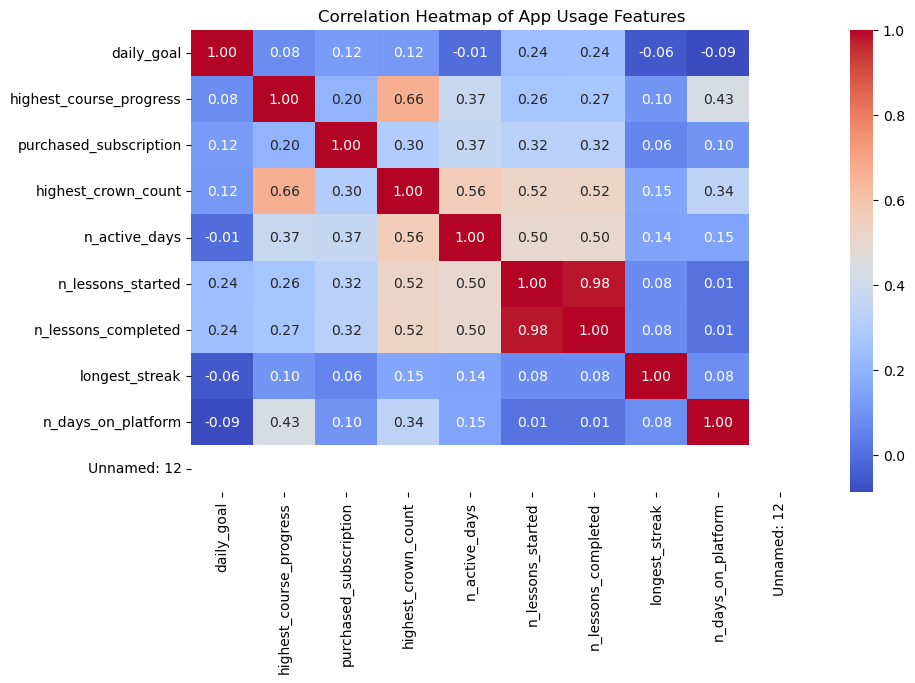

In [18]:
# Correlation heatmap for app usage metrics
plt.figure(figsize=(10,6))
corr = user_behavior_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of App Usage Features")
plt.show()

Observation: highest_crown_count and n_active_days seem to be highly correlated with many variables, meaning it is a potentially strong feature to train models on or serve as a differentiator between different personas

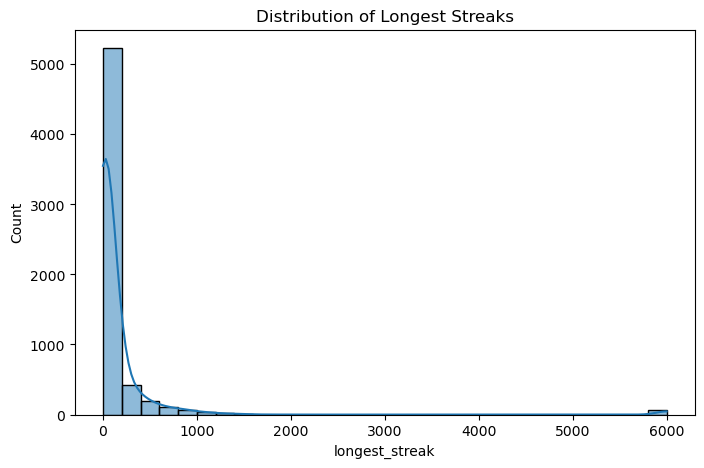

In [20]:
# Streak distribution
plt.figure(figsize=(8,5))
sns.histplot(user_behavior_data["longest_streak"], bins=30, kde=True)
plt.title("Distribution of Longest Streaks")
plt.show()

Observation: Extremely long right tail data with significant outliers on the right

### Note:

One point of concern regarding this is that many classic segmentation algorithms (e.g. K-means) assume continuous numerical variables and relies on Euclidean distance to learn properly. Since this assumption is broken, we must find a way to encode these variables to work with distance-based metrics without disturbing the ordinality of the data. 

Two approaches come to mind.
1. Ordinal encoding: preserves ordinality
2. One-hot encoding: preserves categories, but not ordinality

Since age and income are both ordinal, the best choices would be ordinal encoding. A minor caveat is that ordinal encoding doesn't necessarily correlate to the desired distance, but since the buckets are approximately the same age range, ordinal encoding is representative enough. For non-ordinal categorical variables, one-hot encoding is better since it treats each bucket the same.

# Data Preparation: Cleaning and Feature Engineering

Now that we have a better idea of the dataset, we can go ahead and begin preparing the data for segmentation. We first compute a few summary statistics to observe the quality of the data

### Numerical Summary Statistics

In [24]:
# ---------------------------
# Numeric Dataframe
# ---------------------------
numeric_df = merged.select_dtypes(include="number")

numeric_summary = pd.DataFrame({
    "count_non_missing": numeric_df.count(),
    "missing_count": numeric_df.isnull().sum(),
    "mean": numeric_df.mean(),
    "median": numeric_df.median(),
    "min": numeric_df.min(),
    "max": numeric_df.max(),
    "variance": numeric_df.var(),
    "std_dev": numeric_df.std(),
    "25%": numeric_df.quantile(0.25),
    "75%": numeric_df.quantile(0.75),
})

numeric_summary

,count_non_missing,missing_count,mean,median,min,max,variance,std_dev,25%,75%
survey_complete,6151,0,0.925378,1.0,0.0,1.0,6.906480e-02,0.262802,1.0,1.0
time_spent_seconds,6151,0,3298.293936,325.0,-297.0,584939.0,6.880419e+08,26230.553054,234.0,469.0
daily_goal,2677,3474,25.882331,20.0,1.0,50.0,1.877354e+02,13.701657,20.0,30.0
highest_course_progress,6137,14,27.285319,26.0,-10.0,83.0,4.067567e+02,20.168211,10.0,38.0
highest_crown_count,5857,294,107.039611,81.0,0.0,617.0,9.436320e+03,97.140723,30.0,160.0
n_active_days,6151,0,49.106162,44.0,1.0,289.0,1.536718e+03,39.200995,12.0,85.0
n_lessons_started,5993,158,250.248957,166.0,1.0,4786.0,9.177910e+04,302.950662,55.0,333.0
n_lessons_completed,5993,158,233.736025,153.0,0.0,4686.0,8.175788e+04,285.933350,49.0,311.0
longest_streak,6151,0,154.817265,17.0,0.0,6000.0,3.808099e+05,617.097950,3.0,88.0
n_days_on_platform,6151,0,615.713217,417.0,2.0,2402.0,3.537882e+05,594.800976,100.0,1002.5


### Categorical Summary Statistics

In [26]:
# ---------------------------
# Categorical Dataframe
# ---------------------------
categorical_df = merged.select_dtypes(exclude="number")

categorical_summary = pd.DataFrame({
    "count_non_missing": categorical_df.count(),
    "missing_count": categorical_df.isnull().sum(),
    "unique": categorical_df.nunique(),
    "mode": categorical_df.mode().iloc[0],   # most frequent value
    "freq": categorical_df.apply(lambda x: x.value_counts().iloc[0] if not x.value_counts().empty else None),
})

# ---------------------------
# Save to CSVs if needed
# ---------------------------
numeric_summary.to_csv("numeric_summary.csv")
categorical_summary.to_csv("categorical_summary.csv")

categorical_summary

,count_non_missing,missing_count,unique,mode,freq
user_id,6151,0,6079,35ca11b872c911e984abdca9049399ef,2
age,5803,348,5,35 - 54,2009
annual_income,5154,997,5,"$0 - $10,000",1816
country,6151,0,10,FR,1003
duolingo_platform,5876,275,3,Android phone or tablet,2589
duolingo_subscriber,5867,284,4,"No, I have never paid for Duolingo Plus",3886
duolingo_usage,5877,274,5,Daily,4316
employment_status,5698,453,4,Employed full-time,2898
future_contact,5413,738,2,Yes,4455
gender,5803,348,4,Female,2909


### Observations:

From these summary statistics, we are able to gather a few key pieces of information
1. General:
   - Some data has an extremely large proportion of missing values, meaning removing the datapoints will not be an option since data is valuable for segmentation. Therefore, if the feature is important enough, data imputation will be needed
3. Numeric:
   - Some of the data have very extreme outliers which may impact the way the data is clustered. This is seen by the mean vs median statistics as well as the min and max statistics
4. Categorical:
   - Some features may benefit from additional feature engineering. For example, binary variables such as took_placement_test and purchased_subscription will benefit from a ratio of True / Total to get a sense of the proportion of the feature

## Cleaning and Feature Engineering

We now begin to work through ways to deal with the problems that stem from the observations above. We take combine scripts for data imputation, outlier clipping, feature engineering, and our two types of encoding and combine them into an SKLearn preprocessing pipeline. This is to keep the pipeline order consistent, make the pipeline more robust to different column types, and prevent dimension-based bugs. Below is a short description of each method

### Imputation

For missing values in categorical features, I will impute with the mode. For numeric features, I will impute with the median.

### Outlier Removal

Since we saw from data exploration that there are a few extreme outliers, we clip the outliers based on percentile, leaving only the range from 5th-95th percentile

### Feature Engineering

For binary categorical variables that may benefit from a ratio (True / Total), we add an additional column to support this functionality

### Encoding

We create a script to run two different types of encoding using SKLearn depending on the ordinality. For ordinal variables, we use ordinal encoding, and for the others we use standard one-hot encoding

In [29]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# -------- config --------
ID_COL = "user_id"

AGE_ORDER_CANON = ["Under 18", "18-34", "35 - 54", "55 - 74", "75 or older"]
INCOME_ORDER_CANON = ["0 - 10,000", "11,000 - 25,000", "26,000 - 75,000",
                      "76,000 - 150,000", "151,000 or more"]

ordinal_cols = ["age", "annual_income"]
nominal_cols = [
    "country",
    "duolingo_platform",
    "employment_status",
    "gender",
    "duolingo_subscriber",
    "duolingo_usage",
    "future_contact",
    "other_resources",
    "primary_language_commitment",
    "primary_language_review",
    "primary_language_motivation",
    "primary_language_proficiency",
    "student",
    "took_placement_test",
    "purchased_subscription"
]

# -------- helpers --------
def clip_5_95(X):
    q05 = np.nanpercentile(X, 5, axis=0)
    q95 = np.nanpercentile(X, 95, axis=0)
    return np.clip(X, q05, q95)

winsorizer = FunctionTransformer(clip_5_95, feature_names_out="one-to-one")

def preprocess_merged(merged: pd.DataFrame, drop_all_nan=True, fill_const_if_all_nan=False, const_value=0.0):
    df = merged.copy()

    # 0) clean obvious junk columns like 'Unnamed: *'
    junk_cols = [c for c in df.columns if str(c).startswith("Unnamed")]
    df = df.drop(columns=junk_cols, errors="ignore")

    # 1) optionally drop truly empty columns (all NaN)
    if drop_all_nan:
        all_nan_cols = [c for c in df.columns if df[c].isna().all()]
        df = df.drop(columns=all_nan_cols)

    # 2) choose column sets that exist
    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    numeric_cols = [c for c in numeric_cols if c != ID_COL]

    # 3) normalize ordinal text and set category orders
    ord_categories = []
    for col in ordinal_cols:
        if col == "age":
            ord_categories.append(AGE_ORDER_CANON)
        elif col == "annual_income":
            ord_categories.append(INCOME_ORDER_CANON)
        else:
            ord_categories.append(sorted(df[col].dropna().unique().tolist()))

    # 4) split numeric cols into those with at least one value vs all-NaN
    num_has_vals = [c for c in numeric_cols if df[c].notna().any()]
    num_all_nan = [c for c in numeric_cols if df[c].isna().all()]

    # If you prefer to keep all-NaN numeric cols, impute a constant:
    if fill_const_if_all_nan and num_all_nan:
        df[num_all_nan] = 0.0
        num_has_vals = numeric_cols  # now all are valid

    # 5) pipelines
    numeric_pipe = Pipeline([
        ("impute", SimpleImputer(strategy="median")),
        ("winsorize", winsorizer),
    ])

    ordinal_pipe = Pipeline([
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("encode", OrdinalEncoder(
            categories=ord_categories,
            handle_unknown="use_encoded_value",
            unknown_value=-1
        )),
    ])

    nominal_pipe = Pipeline([
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ])

    pre = ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, num_has_vals),       # only pass numeric cols that have data
            ("ord", ordinal_pipe, ordinal_cols),
            ("nom", nominal_pipe, nominal_cols),
        ],
        remainder="drop"
    )

    X = pre.fit_transform(df)

    # feature names aligned with what actually flowed through
    names_num = list(num_has_vals)
    names_ord = list(ordinal_cols)
    names_nom = []
    if nominal_cols:
        names_nom = pre.named_transformers_["nom"]["onehot"] \
                       .get_feature_names_out(nominal_cols).tolist()

    feature_names = names_num + names_ord + names_nom
    out = pd.DataFrame(X, columns=feature_names, index=df.index)

    if ID_COL in df.columns:
        out.insert(0, ID_COL, df[ID_COL].values)

    return out, pre

# ---- run ----
processed, pre = preprocess_merged(merged)
processed.head()


,user_id,survey_complete,time_spent_seconds,daily_goal,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,...,primary_language_proficiency_Advanced,primary_language_proficiency_Beginner,primary_language_proficiency_Intermediate,student_Full-time student,student_Not currently a student,student_Part-time student,took_placement_test_False,took_placement_test_True,purchased_subscription_False,purchased_subscription_True
0,35c9fc6e72c911e99681dca9049399ef,1.0,193.0,20.0,58.0,275.0,91.0,232.0,232.0,585.5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,35c9fdde72c911e98630dca9049399ef,1.0,139.0,20.0,4.0,22.0,54.0,90.0,88.0,27.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,35c9feb072c911e9ab4cdca9049399ef,1.0,124.0,20.0,11.0,17.0,30.0,49.0,47.0,30.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,35c9ff7072c911e9900ddca9049399ef,1.0,229.0,20.0,11.0,55.0,93.0,768.5,734.5,40.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,35ca002672c911e99effdca9049399ef,1.0,157.0,20.0,64.0,283.0,85.0,215.0,252.0,266.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Segmentation: Clustering

Now that we have our processed dataset, we can finally begin to fit our model for the segmentation. We will first use unsupervised machine learning techniques (e.g. KMeans clustering) to model the data, and then we will interpret the data based on its features.

## ML Modeling

We will approach this in the following manner:
1. Prepare feature matrix
2. Test different models to see which works best
3. Fit final model and attach cluster labels

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.base import clone

### Preparing Feature Matrix

In [33]:
# ------------------------------------------------------
# 1) Prepare feature matrix (exclude ID column if present)
# ------------------------------------------------------
X = processed.copy()
id_col = "user_id" if "user_id" in X.columns else None
if id_col:
    X_features = X.drop(columns=[id_col])
else:
    X_features = X

# Standardize so all features contribute comparably
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

### Model Comparison: KMeans vs Gaussian Mixture Models


=== K-Means ===
Silhouette by k: {3: np.float64(0.0099), 4: np.float64(0.0352), 5: np.float64(0.0046), 6: np.float64(-0.0233)}
Chosen k: 4
Cluster sizes:
 0    1877
1    3288
2       1
3     985
Name: count, dtype: int64


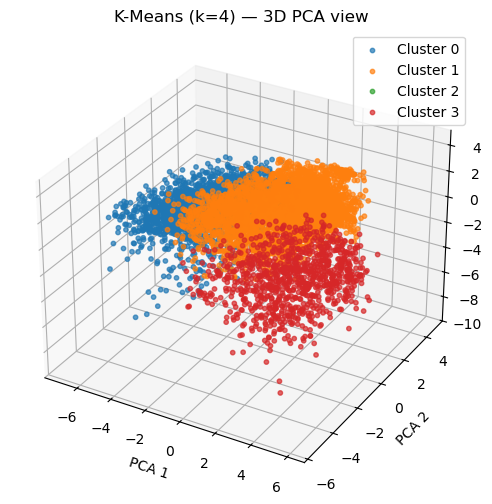


=== Gaussian Mixture ===
Silhouette by k: {3: np.float64(0.4716), 4: np.float64(0.2509), 5: np.float64(0.106), 6: np.float64(0.1071)}
Chosen k: 3
Cluster sizes:
 0    5595
1     553
2       3
Name: count, dtype: int64


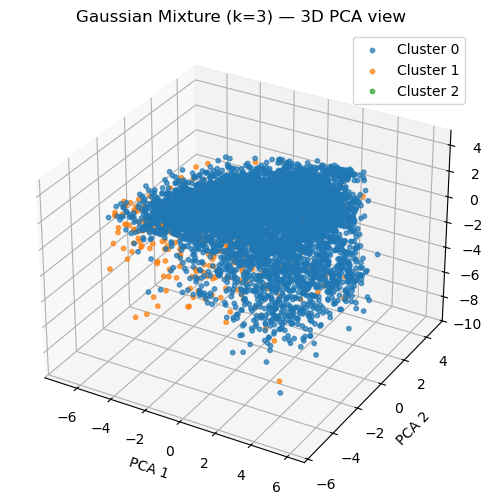

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection

# Project to 3D with PCA
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(X_scaled)

# -------------------------------
# 1) Helper: run model across ks
# -------------------------------
def evaluate_model(model_name, base_estimator, ks=(3,4,5,6)):
    scores = {}
    labels_per_k = {}
    fitted_per_k = {}

    for k in ks:
        est = clone(base_estimator)
        if isinstance(est, KMeans):
            est.set_params(n_clusters=k, n_init=10, random_state=42)
            lbls = est.fit_predict(X_scaled)
        else:  # GMM
            est.set_params(n_components=k, random_state=42)
            est.fit(X_scaled)
            lbls = est.predict(X_scaled)

        if len(set(lbls)) > 1:
            sil = silhouette_score(X_scaled, lbls)
        else:
            sil = -1.0

        scores[k] = sil
        labels_per_k[k] = lbls
        fitted_per_k[k] = est

    # pick best k by silhouette
    best_k = max(scores, key=scores.get)
    best_labels = labels_per_k[best_k]
    best_model = fitted_per_k[best_k]

    print(f"\n=== {model_name} ===")
    print("Silhouette by k:", {k: round(v, 4) for k, v in scores.items()})
    print("Chosen k:", best_k)

    # cluster sizes
    sizes = pd.Series(best_labels).value_counts().sort_index()
    print("Cluster sizes:\n", sizes)

    # 3D plot
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection="3d")
    for c in sorted(np.unique(best_labels)):
        m = best_labels == c
        ax.scatter(X_pca3[m,0], X_pca3[m,1], X_pca3[m,2], s=10, alpha=0.7, label=f"Cluster {c}")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    ax.set_title(f"{model_name} (k={best_k}) — 3D PCA view")
    ax.legend()
    plt.show()

    # centroids (optional): return in original feature scale
    centroids_df = None
    if isinstance(best_model, KMeans):
        cent_scaled = best_model.cluster_centers_
        centroids_df = pd.DataFrame(
            scaler.inverse_transform(cent_scaled),
            columns=X_features.columns
        )
    elif isinstance(best_model, GaussianMixture):
        cent_scaled = best_model.means_
        centroids_df = pd.DataFrame(
            scaler.inverse_transform(cent_scaled),
            columns=X_features.columns
        )

    return {
        "scores": scores,
        "best_k": best_k,
        "labels": best_labels,
        "model": best_model,
        "sizes": sizes,
        "centroids_original_scale": centroids_df
    }

# -------------------------------
# 2) Run KMeans and GMM
# -------------------------------
km_results  = evaluate_model("K-Means", KMeans())
gmm_results = evaluate_model("Gaussian Mixture", GaussianMixture())

## Observations

We see that in terms of trying to understand natural groupings, The GMM does a much better job due to it's high silhouette score. However, we must note that as a result, the cluster classes are extremely imbalanced, with a majority in cluster 0, a few in cluster 1, and almost none in cluster 2.

KMeans, on the other hand, has a very low silhouette score but balanced classes (except for class 1). This means that despite the low silhouette score, it may be more interpretable to use KMeans as a way to force groupings, a more practical method if we want to develop user personas. This creates more actionable differentiation, which can potentially be better at driving product recommendations.

From this, we can see a potential compromise. Observing the k-values of the GMM, we see that although 3 clusters give the most optimal silhouette score, other clusters may potentially give better balanced classes while only trading off part of the silhouette score. Thus, we test GMM with different cluster sizes to see if this is true.

### GMM Cluster Balance Test

In [37]:
# range of clusters to test
cluster_range = range(2, 7)  # 2 to 6 clusters

for n in cluster_range:
    gmm = GaussianMixture(n_components=n, n_init=10, random_state=42)
    cluster_labels = gmm.fit_predict(X_scaled)

    segmented = processed.copy()
    segmented["cluster"] = cluster_labels

    # quick cluster sizes
    cluster_sizes = segmented["cluster"].value_counts().sort_index()
    print(f"\nCluster sizes for n_components={n}:\n", cluster_sizes)


Cluster sizes for n_components=2:
 cluster
0     572
1    5579
Name: count, dtype: int64

Cluster sizes for n_components=3:
 cluster
0    5524
1     286
2     341
Name: count, dtype: int64

Cluster sizes for n_components=4:
 cluster
0     604
1    4284
2       1
3    1262
Name: count, dtype: int64

Cluster sizes for n_components=5:
 cluster
0     739
1    4942
2       3
3     431
4      36
Name: count, dtype: int64

Cluster sizes for n_components=6:
 cluster
0    4843
1     835
2       1
3     171
4       1
5     300
Name: count, dtype: int64


### Balance Conclusion

Based on this, we can determine that n_components=4 gives a relatively balanced clusters while keeping a reasonable silhouette score of ~0.25. To build a persona from these clusters, we can ignore cluster 1 since there are too few data points, focusing on clusters 0, 2, and 3.

### GMM Final Fit


Cluster sizes:
 cluster
0     604
1    4284
2       1
3    1262
Name: count, dtype: int64


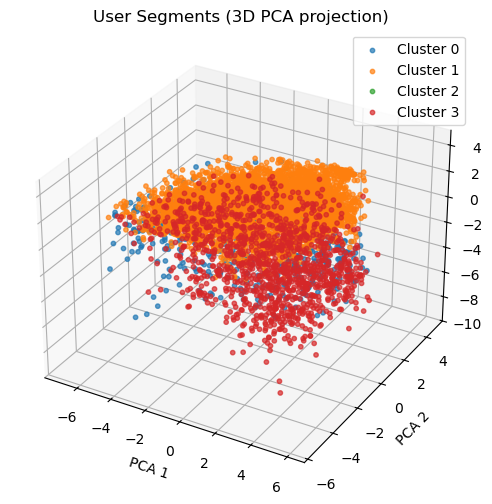

In [39]:
# ------------------------------------------------------
# 3) Fit final GMM and attach cluster labels
# ------------------------------------------------------
gmm = GaussianMixture(n_components=4, n_init=10, random_state=42)
cluster_labels = gmm.fit_predict(X_scaled)

segmented = processed.copy()
segmented["cluster"] = cluster_labels

# quick cluster sizes
cluster_sizes = segmented["cluster"].value_counts().sort_index()
print("\nCluster sizes:\n", cluster_sizes)

# ------------------------------------------------------
# PCA Plot
# ------------------------------------------------------

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

for c in range(4):
    mask = cluster_labels == c
    ax.scatter(X_pca3[mask, 0], X_pca3[mask, 1], X_pca3[mask, 2],
               s=10, label=f"Cluster {c}", alpha=0.7)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("User Segments (3D PCA projection)")
ax.legend()
plt.show()


# Developing Segments and Personas

Now that we have our chosen model with fine-tuned parameters, we can now begin developing our personas for the segmentation. We start off by cleaning out unnecessary clusters (too small, therefore noisy) and computing the means of each cluster's features. 

## Creating the Personas

We first start by observing the cluster proportions

In [81]:
usable_clusters = [0, 1, 3]
segmented_use = segmented[segmented["cluster"].isin(usable_clusters)].copy()

# ---------- 1) sizes ----------
size_counts = segmented_use["cluster"].value_counts().sort_index()
size_perc = (size_counts / len(segmented_use) * 100).round(1)
print("Cluster sizes:\n", size_counts)
print("\nCluster % of users:\n", size_perc)

Cluster sizes:
 cluster
0     604
1    4284
3    1262
Name: count, dtype: int64

Cluster % of users:
 cluster
0     9.8
1    69.7
3    20.5
Name: count, dtype: float64


In [83]:
# ---------- 2) cluster profiles ----------
# Drop id if present
id_col = "user_id" if "user_id" in segmented_use.columns else None
feature_cols = [c for c in processed.columns if c != id_col]

profiles = segmented_use.groupby("cluster")[feature_cols].mean(numeric_only=True)

From there, we deal with our encoded data. We write functions to detect one-hot encoding from normal numerical columns as well as a function to map our ordinal encoding back to our original buckets.

In [86]:
# ---------- 3) detect one-hot columns (0/1 only) ----------
def is_one_hot_col(s: pd.Series) -> bool:
    u = pd.unique(s.dropna())
    return set(u).issubset({0, 1}) and len(u) <= 2

onehot_cols = [c for c in feature_cols if is_one_hot_col(processed[c])]
numeric_cols = [c for c in feature_cols if c not in onehot_cols]

In [88]:
def most_common_ordinal_label(series, labels):
    # choose the most common integer bucket per cluster
    # if series is fractional (means), round to nearest int
    idx = int(np.clip(np.rint(series), 0, len(labels)-1))
    return labels[idx]

readable_ordinals = {}
for cl in profiles.index:
    row = profiles.loc[cl]
    out = {}
    if "age" in profiles.columns:
        out["age"] = most_common_ordinal_label(row["age"], age_order)
    if "annual_income" in profiles.columns:
        out["annual_income"] = most_common_ordinal_label(row["annual_income"], income_order)
    readable_ordinals[cl] = out

Afterwards, we pick the top distinguishing feature per cluster. We do this by computing how far each feature’s mean is from the overall average (absolute difference) and taking the top N.
- These are the traits that most differentiate the cluster, which create the perfect factors for separating distinct personas
- We adapt this metric for categorical variables (one-hot encoded) by looking at within-cluster proportions vs global proportions

In [91]:
# ---------- 5) pick top distinguishing features (deviation from overall mean) ----------
def top_features_mixed(profiles, overall_means, onehot_cols, topn=10):
    """
    Picks top features separately for numeric and categorical (one-hot) features.
    Returns dict of cluster -> list of top feature strings.
    """
    out = {}
    for cl in profiles.index:
        cluster_feats = []

        # ---- Numeric features ----
        num_diffs = (profiles.loc[cl, profiles.columns.difference(onehot_cols)]
                     - overall_means[profiles.columns.difference(onehot_cols)])
        num_diffs = num_diffs.abs().sort_values(ascending=False)
        top_num = [f"{feat} (avg {profiles.loc[cl, feat]:.1f})"
                   for feat in num_diffs.head(topn).index]

        # ---- Categorical one-hot features ----
        cat_diffs = (profiles.loc[cl, onehot_cols] - overall_means[onehot_cols])
        # sort by absolute difference in proportions
        cat_diffs = cat_diffs.abs().sort_values(ascending=False)
        top_cat = []
        for feat in cat_diffs.head(topn).index:
            val = profiles.loc[cl, feat] * 100
            overall_val = overall_means[feat] * 100
            top_cat.append(f"{feat}: {val:.0f}% (overall {overall_val:.0f}%)")

        # combine (you can also keep them separate if you prefer)
        cluster_feats.extend(top_num[:topn])
        cluster_feats.extend(top_cat[:topn])

        out[cl] = cluster_feats
    return out

# Usage
overall_means = processed.drop(columns=["user_id"], errors="ignore").mean(numeric_only=True)
top_feats_mixed = top_features_mixed(profiles, overall_means, onehot_cols, topn=10)

Print formatting function for aesthetics

In [94]:
# ---------- 7) print personas ----------
# Example output
for cl, feats in top_feats_mixed.items():
    print(f"\nCluster {cl}:")
    for f in feats:
        print("-", f)


Cluster 0:
- n_days_on_platform (avg 660.3)
- n_lessons_started (avg 252.2)
- n_lessons_completed (avg 237.1)
- longest_streak (avg 114.4)
- highest_crown_count (avg 114.3)
- time_spent_seconds (avg 421.2)
- n_active_days (avg 51.3)
- highest_course_progress (avg 30.3)
- daily_goal (avg 23.3)
- age (avg 1.5)
- student_Not currently a student: 48% (overall 82%)
- student_Full-time student: 31% (overall 12%)
- student_Part-time student: 21% (overall 6%)
- employment_status_Unemployed: 27% (overall 15%)
- purchased_subscription_False: 57% (overall 69%)
- purchased_subscription_True: 43% (overall 31%)
- duolingo_subscriber_No, I have never paid for Duolingo Plus: 57% (overall 68%)
- duolingo_subscriber_Yes, I currently pay for Duolingo Plus: 36% (overall 26%)
- primary_language_proficiency_Beginner: 46% (overall 54%)
- employment_status_Employed full-time: 47% (overall 54%)

Cluster 1:
- n_lessons_started (avg 236.8)
- n_lessons_completed (avg 221.6)
- longest_streak (avg 93.1)
- highest_

# Categorizing the Personas

Now that we have the differentiating data for each persona, we can begin to observe their differences. Based on these descriptions, I will place these three categories under these umbrellas in order of cluster number:

### Persona One: Young Ambitious Students (Cluster 0)

Size: 9.8% of users
Demographics:
- Young (avg age ≈ 18–34)
- High proportion of students: 31% full-time (vs 12% overall), 21% part-time (vs 6%)
- More unemployed (27% vs 15%)
- Above-average subscription rate: 43% paying vs 31% overall

Behavioral Traits:
- Very high engagement: ~252 lessons started, longest streak 114 days, crown count 114
- High course progress (30%) and active ~51 days
- Daily goal ~23 → disciplined learners

Implications:
- These are ambitious younger learners with stronger-than-average commitment.
- They are willing to pay and over-index as subscribers.

### Persona Two: Steady Casual Adults (Cluster 1)

Size: 69.7% of users (majority)
Demographics:
- Slightly older (avg age ≈ 35–54)
- 60% employed full-time, 20% retired
- Not students (100% not currently a student)
- Uses Movies/TV more than average (46% vs 37%)

Behavioral Traits:
- Moderate engagement: ~237 lessons started, streak ~93 days
- Course progress ~27%
- Strong daily usage (78% vs 75%)
- Beginner/intermediate split aligns with average

Implications:
- This is the stable core of casual adult learners.
- They fit Duolingo into daily life, often supplementing with movies/TV.

### Persona Three: Exploring Hobbyist Students (Cluster 3)

Size: 20.5% of users
Demographics:
- Young (avg age ≈ 18–24)
- High proportion of students: 44% full-time, 19% part-time
- More unemployed (35% vs 15%)
- Much less likely to use Movies/TV (3% vs 37%)
- 11% motivated by “challenge myself” (vs 3% overall)

Behavioral Traits:
- Lower engagement than Persona 0: ~181 lessons started, streak ~67 days, crown count 87
- Course progress ~26%, daily usage lower (60% vs 75%)
- Active ~38 days (lowest across clusters)

Implications:
- These are younger learners experimenting with language as a personal challenge.
- Engagement is inconsistent, but motivation is high.

# Product and Marketing Insights

From these three personas, we can think about what specific product or marketing changes we can target for each group before making an overall product recommendation

### Persona One:

Since this is a super motivated younger demographic, this would be less of a user retention application and more of a revenue driving application. For a younger demographic, additional gamification (for a level-up feeling) and challenge frameworks can be extremely effective in keeping them motivated. Since this is a very competitive group, a good potential addition could be community-style challenges to nurture this demographic by having them compete against each other. To further increase their subscription rate, potentially add student-friendly offers since they have low to no income.

### Persona Two:
This is our majority userbase, which makes them extremely important. They have a high daily usage but a lower engagement, which signals that their motivation is less competition-based and more driven by convenience and curiosity (as seen by their high engagement with movies and TV shows). Thus, the best features to push towards this demographic are low-friction features such as gentler reminders and shorter lessons to prevent churn. Since this is also an older demographic, they may benefit less from gamification and more from nurturing their cultural curiosity such as integrating curated media into their learning habits. 


### Persona Three:

This is also a young curious demographic but not fully immersed into the Duolingo ecosystem like persona one as seen by their engagement. Thus, attempting to ramp up their engagement may put them off of the app. Instead, the most important thing to keep in mind is to prevent this demographic from churning while introducing small features to sutbly increase their engagement and shift them towards persona one. Thus, they might benefit from similar features mentioned for Persona One, but potentially tuned down in intensity. For example, streak protection frameworks can be introduced to keep their usage motivation with less punishment for lower daily usage.

# Final Recommendation

Based on these three personas, a few product and marketing recommendations come to mind.

### Product

These are the actionable product changes we can make to increase retention, engagement, and revenue

1. Extending Dulingo's engagement-based features with Matchmaking Rating (MMR) for high engagement users and flexible lesson lengths for low engagement users
    - Targetting our competitive demographic, we can introduce a more competitive ranked system that is more skills-based than xp-based. This way, we can not only improve their motivation to learn the content but foster a closer community within Persona One. This is a very common ranked technique used in competitive videogames, and will push the gamification of the app further towards the younger demographic.
    - One issue is that this may scare off more casual users of the app, so one way to deal with this is to segment this feature by XP and engagement. Once a user hits a certain level or engagement frequency, this feature will be unlocked, and they may choose if they want to join or not.
    - For low engagement users, we can introduce flexible lesson lengths to allow them to adapt to their needs depending on the day. This will reduce churn as well as ease them into the Duolingo ecosystem. For all non-competitive modes, we also introduce a streak protection system.<br><br>

2. Introducing curated media into Duolingo's learning
    - Targetting our majority demographic of older casual learners (as well as potentially personas one and two), we can streamline their engagement by partnering with streaming services such as Netflix, Hulu, and Disney to integrate media-based content into the lessons. Not only will this prevent churn from persona three, it may also increase their engagement since their time is spent less on other apps and more centralized around Duolingo.
    - This will also potentially benefit personas one and two, especially the ones with a strong motivation to learn the language. Media partnership will not only nurture their curiosity for the subject, but also serve as an effective learning tool since immersion is often the best way to learn a new language.

### Marketing

These are the actionable marketing tactics we can use to advertise to our targeted userbases

1. Persona One: Market premium student-friendly benefits for higher subscription rate
2. Persona Two: Market Duolingo as a 'learn at your own pace' environment
3. Persona Three: Market Duolingo as a daily short fun challenge (think Wordle)